Best Period: 190, Best Return: 5.06%, Trade: 338
Worst Period: 150, Worst Return: 2.58%, Trade: 432


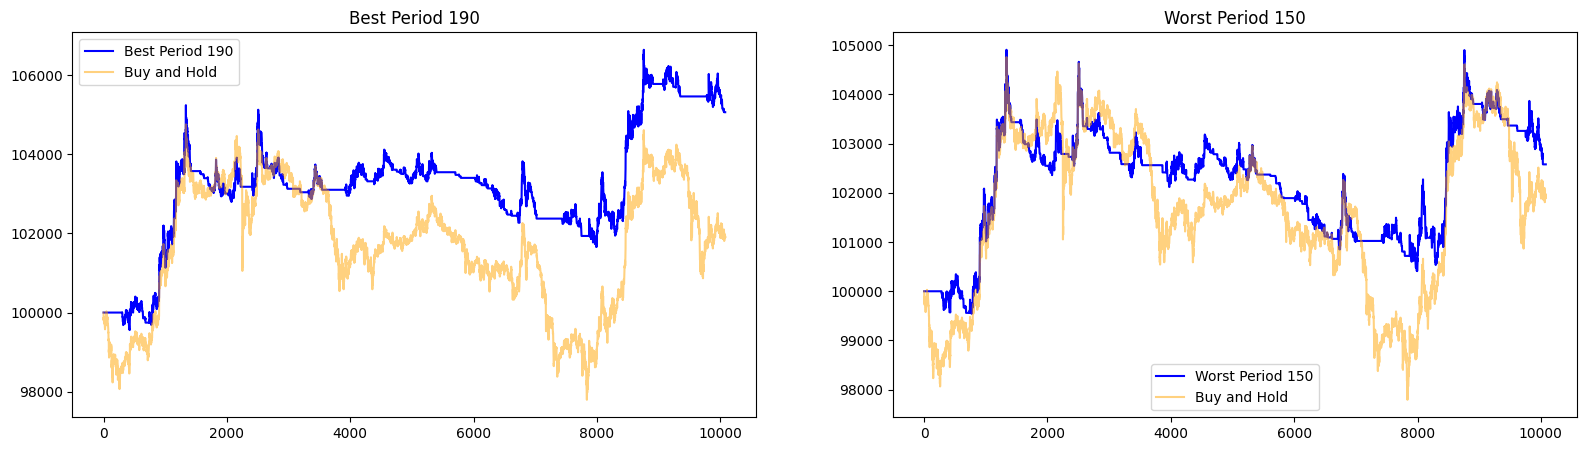

Buy and Hold Return: 1.91%


In [9]:
import pandas as pd
import numpy as np
import talib
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('btcusdt_1m.csv')
def calc_capital(index):
    return (usdt + btc * df['Close'][index])

# Initialize variables to track the best and worst returns
best_return = -np.inf
worst_return = np.inf
best_period = None
worst_period = None

for period in range(150, 201):

    usdt = 100000
    btc = 0
    holding = False
    capital_history = []
    commission = 0.00003
    trade = 0

    df['signal'] = 0
    df['ma'] = talib.SMA(df['Close'].values, timeperiod=period)
    df.loc[period:, 'signal'] = np.where(df['Close'][period:] > df['ma'][period:], 1, 0)
    df['position'] = df['signal'].diff()

    for i in range(len(df)):
        if df['position'][i] == 1 and not holding:  # Buy
            btc = usdt / df['Close'][i] * (1 - commission)
            usdt = 0
            holding = True  # Deduct commission from capital
            trade += 1
        elif df['position'][i] == -1 and holding:  # Sell
            usdt = btc * df['Close'][i] * (1 - commission)
            btc = 0  # Deduct commission from capital
            holding = False
            trade += 1
        capital_history.append(calc_capital(i))
    total_return = (capital_history[-1] - 100000) / 100000

    # Update best and worst returns and periods
    if total_return > best_return:
        best_return = total_return
        best_period = period
        best_capital_history = capital_history.copy()
        best_trade_amount = trade  # Copy the capital history for the best period
    if total_return < worst_return:
        worst_return = total_return
        worst_period = period
        worst_capital_history = capital_history.copy()
        worst_trade_amount = trade  # Copy the capital history for the worst period

# Print the results
print(f"Best Period: {best_period}, Best Return: {best_return:.2%}, Trade: {best_trade_amount}")
print(f"Worst Period: {worst_period}, Worst Return: {worst_return:.2%}, Trade: {worst_trade_amount}")

# After loading the data, calculate 'buy and hold' equity curve
initial_btc_for_hold = 100000 / df['Close'][0]
df['hold_value'] = initial_btc_for_hold * df['Close']

plt.figure(figsize=(30, 5))

# Best strategy subplot
plt.subplot(1, 3, 1)
plt.plot(best_capital_history, label=f'Best Period {best_period}', color='blue')
plt.plot(df['hold_value'], label='Buy and Hold', color='orange', alpha=0.5)  # Adding the buy and hold curve
plt.title(f'Best Period {best_period}')
plt.legend()

# Worst strategy subplot
plt.subplot(1, 3, 2)
plt.plot(worst_capital_history, label=f'Worst Period {worst_period}', color='blue')
plt.plot(df['hold_value'], label='Buy and Hold', color='orange', alpha=0.5)  # Adding the buy and hold curve
plt.title(f'Worst Period {worst_period}')
plt.legend()

plt.show()

# Print the 'buy and hold' return
buy_and_hold_return = (df['hold_value'].iloc[-1] - 100000) / 100000
print(f"Buy and Hold Return: {buy_and_hold_return:.2%}")


In [10]:
df.head()
df.tail()

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore,signal,ma,position,hold_value
10076,2023-12-19 23:56:00,42278.67,42290.82,42278.67,42290.82,8.76826,2023-12-19 23:56:59.999,370732.627743,432,7.42208,313814.713549,0,0,42323.76720,0.0,101964.115307
10077,2023-12-19 23:57:00,42290.81,42291.09,42272.18,42272.19,11.86417,2023-12-19 23:57:59.999,501645.693144,676,6.27982,265525.428535,0,0,42324.05595,0.0,101919.197959
10078,2023-12-19 23:58:00,42272.18,42281.02,42261.10,42261.10,12.75264,2023-12-19 23:58:59.999,539121.541852,604,6.16722,260729.088729,0,0,42324.36735,0.0,101892.459720
10079,2023-12-19 23:59:00,42261.11,42276.00,42261.10,42275.99,14.59783,2023-12-19 23:59:59.999,616996.633348,428,9.99050,422271.524469,0,0,42324.78390,0.0,101928.359844
10080,2023-12-20 00:00:00,42275.99,42277.73,42266.82,42266.82,15.69885,2023-12-20 00:00:59.999,663651.323565,691,6.81230,287974.238026,0,0,42325.37805,0.0,101906.250769
